# Pandas Practice 2

![IRIS, https://github.com/simonava5/fishers-iris-data](./images/iris.png)

After the notebook with a lot of new input, let's start applying it totally by yourselves. 
For this purpose we will use one of the most standard real-life datasets: Its called Iris Dataset, and is all about the plant iris. Let's learn a little bit more about the dataset by looking at it. 

## Learning Objectives





By the end of this notebook, you will feel more comfortable with your newly acquired knowledge, as you will see that you can

- load data from csv files into DataFrames
- access data stored in DataFrames
- use the general functions of a DataFrame to answer questions about the data
- create insightful plots using the pandas function `.plot()`
- explain what conclusions you draw from these visualizations.


In [2]:
# import pandas
import pandas as pd

In [13]:
# load the data
df = pd.read_csv('data/iris.csv')

# make a copy of your dataframe
df = df.copy()
# make a list column names
cols = df.columns.tolist()
# replace space with _
cols = [col.replace(' ', '_') for col in cols]
# reassign new column names to dataframe
df.columns = cols

Let us first have a look at the head of the table, maybe also on the last 10 rows...

In [14]:
print(df.head())
print(df.tail(10))

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
     sepal_length  sepal_width  petal_length  petal_width         species
140           6.7          3.1           5.6          2.4  Iris-virginica
141           6.9          3.1           5.1          2.3  Iris-virginica
142           5.8          2.7           5.1          1.9  Iris-virginica
143           6.8          3.2           5.9          2.3  Iris-virginica
144           6.7          3.3           5.7          2.5  Iris-virginica
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virg

How many irises are in the data set?

In [8]:
df.info()
len(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


150

How many different species are there?

In [12]:
print(df.species.nunique())
(df.species.unique())

3


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Calculate the mean, median, mode for petal length

In [15]:
print(df.petal_length.mean())
print(df.petal_length.median())
print(df.petal_length.mode())

3.758666666666666
4.35
0    1.5
Name: petal_length, dtype: float64


What can you conclude about the distribution for petal length?

<Axes: ylabel='Frequency'>

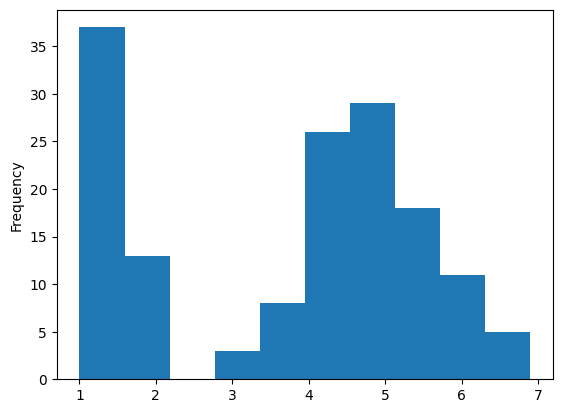

In [18]:
df.petal_length.plot(kind="hist")


What is the smallest and largest value for petal length?

In [19]:
df.petal_length.min()



1.0

In [20]:
df.petal_length.max()

6.9

Calculate the variance and standard deviation for petal length

In [21]:
df.petal_length.var()

3.113179418344519

In [22]:
df.petal_length.std()

1.7644204199522626

Calculate the basic descriptive statistics for all columns of the iris data set with a single command.

In [23]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


What is the overall average for sepal length?

In [24]:
df.sepal_length.mean()

5.843333333333334

Use DataFrame grouping function to determine the count by species.

In [26]:
df.groupby("species").sepal_length.count()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: sepal_length, dtype: int64

Use DataFrame grouping function to determine the average length and width of sepals and pedals by species.

In [28]:
df.groupby("species").mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


Add the sum of the sepal width and length as a new column to your data frame.

In [38]:

df.eval("sepal_total = sepal_length + sepal_width", inplace=True)
df


,sepal_length,sepal_width,petal_length,petal_width,species,sepal_total
0,5.1,3.5,1.4,0.2,Iris-setosa,8.6
1,4.9,3.0,1.4,0.2,Iris-setosa,7.9
2,4.7,3.2,1.3,0.2,Iris-setosa,7.9
3,4.6,3.1,1.5,0.2,Iris-setosa,7.7
4,5.0,3.6,1.4,0.2,Iris-setosa,8.6
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,9.7
146,6.3,2.5,5.0,1.9,Iris-virginica,8.8
147,6.5,3.0,5.2,2.0,Iris-virginica,9.5
148,6.2,3.4,5.4,2.3,Iris-virginica,9.6


Visualize petal length with a histogram

species
Iris-setosa        Axes(0.125,0.11;0.775x0.77)
Iris-versicolor    Axes(0.125,0.11;0.775x0.77)
Iris-virginica     Axes(0.125,0.11;0.775x0.77)
Name: petal_length, dtype: object

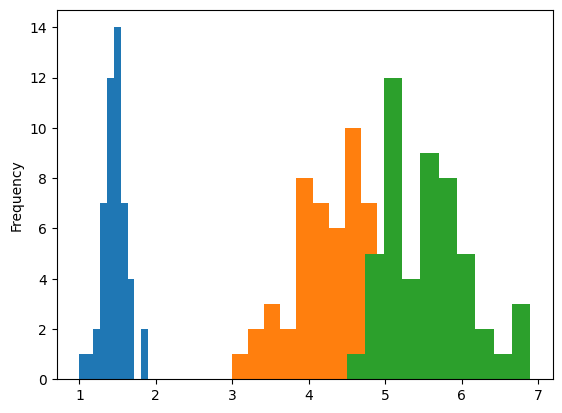

In [41]:
df.groupby("species").petal_length.plot(kind="hist")

Describe the distribution

In [ ]:
Bimodale normal distribution

Which is more informative: the summary statistics or visualizations?

In [ ]:
Depends on grouping of visulization

Visualize petal length and width with a "scatter_matrix"

array([[<Axes: xlabel='petal_length', ylabel='petal_length'>,
        <Axes: xlabel='petal_width', ylabel='petal_length'>],
       [<Axes: xlabel='petal_length', ylabel='petal_width'>,
        <Axes: xlabel='petal_width', ylabel='petal_width'>]], dtype=object)

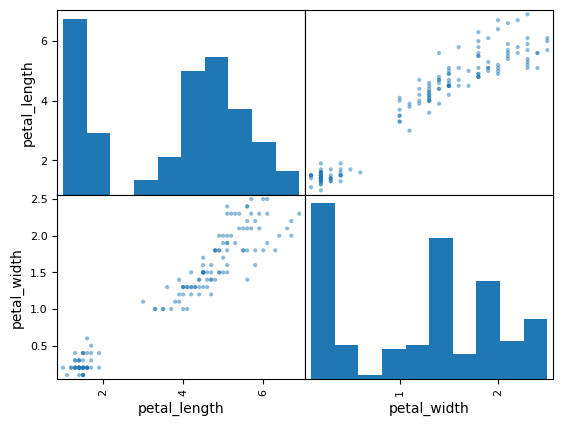

In [49]:
pd.plotting.scatter_matrix(df[["petal_length","petal_width"]])

Create a new column with a rough estimate of petal area by multiplying petal length and width together.

In [50]:
df.eval("petal_area = petal_length * petal_width", inplace=True)
df

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_total,petal_area
0,5.1,3.5,1.4,0.2,Iris-setosa,8.6,0.28
1,4.9,3.0,1.4,0.2,Iris-setosa,7.9,0.28
2,4.7,3.2,1.3,0.2,Iris-setosa,7.9,0.26
3,4.6,3.1,1.5,0.2,Iris-setosa,7.7,0.30
4,5.0,3.6,1.4,0.2,Iris-setosa,8.6,0.28
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,9.7,11.96
146,6.3,2.5,5.0,1.9,Iris-virginica,8.8,9.50
147,6.5,3.0,5.2,2.0,Iris-virginica,9.5,10.40
148,6.2,3.4,5.4,2.3,Iris-virginica,9.6,12.42


Create a new dataframe with petal areas greater than $1cm^2$.

In [51]:
df_new = df.query("petal_area > 1")
df_new

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_total,petal_area
50,7.0,3.2,4.7,1.4,Iris-versicolor,10.2,6.58
51,6.4,3.2,4.5,1.5,Iris-versicolor,9.6,6.75
52,6.9,3.1,4.9,1.5,Iris-versicolor,10.0,7.35
53,5.5,2.3,4.0,1.3,Iris-versicolor,7.8,5.20
54,6.5,2.8,4.6,1.5,Iris-versicolor,9.3,6.90
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,9.7,11.96
146,6.3,2.5,5.0,1.9,Iris-virginica,8.8,9.50
147,6.5,3.0,5.2,2.0,Iris-virginica,9.5,10.40
148,6.2,3.4,5.4,2.3,Iris-virginica,9.6,12.42


Create 3 new dataframes, one for each species. Use the entire dataset.

In [54]:
df.species.unique()


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [59]:
df_setosa = df.query("species == 'Iris-setosa'")
df_versicolor = df.query("species == 'Iris-versicolor'")
df_virginica = df.query("species == 'Iris-virginica'")